Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.+
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.+
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.+
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.+
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [60]:
import pandas as pd
from pylab import rcParams
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport
from geopy import distance

In [61]:
%matplotlib inline

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [63]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [64]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [66]:
prof_rep = ProfileReport(data)
prof_rep

C:\Users\Prozo\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,14
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,10.7 MiB
Average record size in memory,112.0 B
Numeric,9
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,2


## Описание 1:
- null значения отсутствуют
- offer_class_group и ride_type_desc- тип значений - object (категории), остальные значения числовые, но часть тоже категории
- min знач. координат водителя и пассажира, а также расстояния и длительности поездки имеют однозначные аномалии: значение (-1)


## Описание 2:

driver_latitude-        не корректные данные -1 таких значений 141 вместе с driver_longitude -удалить

driver_longitude-       не корректные данные -1 таких значений 141 вместе с driver_latitude -удалить

weekday_key             7  значений -norm

hour_key                24 значения -norm

origin_order_latitude   не корректные данные -1 дропнуть ниже 35 град., таких значений 14 шт.

origin_order_longitude  не корректные данные -1 дропнуть ниже 35 град., таких значений 14 шт. 

distance_km             имеются поездки длиньше 2000 км. и отрицательные данные:
                            26 тыс поездок с расстоянием -1 км.!!!! => -1 исправить на 0. 
                            Определить предел выброса:
                            - 0 км. -предполагаю отменённый заказ
                                свыше 1000 км. всего 18 поездок. предлагаю удалить значения выше.
                                на гистограмме 
                                ### data['distance_km'].loc[((data['distance_km']<1000)&(data['distance_km']>-1))].plot(kind='hist', bins= 1000) ### 
                                Выглядит как нормальное распределение. После изучения duration_min принял решение сократить отбрасываемую границу до 750 км.
                                
                                
duration_min            имеются поездки дольше 1000 мин. и отрицательные данные. 
                            Отрицательные значения -1 имеют признак времени тоже -1 => исправить на 0 
                            Определить предел выброса: максимальное время поездки при при поездках до 1000 км. составляет 713 мин, однако таких значений 19 штук, однако если ограничить максимальную длительность поездки 600 минут, то отбрасываемых значений останется 23( поменяется не существенно, но верхняя граница distsnce_km сократиться до 750 км.  => определим верхнюю границу в 600 мин и 750 км.

driver_response         2 значения norm - искомое значение boolean

offer_class_group       имеется 8 поездок TEST - удалить тем более они с отрицательным значением distance_km

ride_type_desc          4 категории

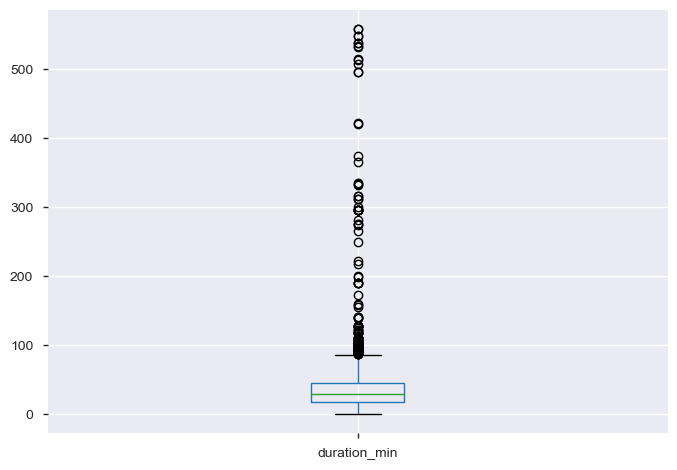

In [67]:
#Изучение данных(Чтобы не раздувать notebook делаю в одном блоке)):
#data.driver_latitude.plot(kind='box') #!!!!!!не корректные данные -1
#data.driver_longitude.plot(kind='box') #!!!!!!не корректные данные -1
#data.weekday_key.plot(kind='box')
#data.weekday_key.unique()#!!! 7  значений -norm
#data.hour_key.plot(kind='box')
#data.hour_key.unique() #!!!  24 значения -norm
#data['origin_order_latitude'].loc[(data['origin_order_latitude']>53)].plot(kind='box') #!!!!!!не корректные данные -1 
#data['origin_order_longitude'].loc[(data['origin_order_longitude']>36)].plot(kind='box') #!!!!!!не корректные данные -1
#data['distance_km'].loc[((data['distance_km']<0))].plot(kind='box')#!!!!!!!! имеются поездки длиньше 1000 км. Определить предел выброса
#data['distance_km'].loc[((data['distance_km']<1000)&(data['distance_km']>-1))].plot(kind='hist', bins= 1000)
data.duration_min.loc[((data['duration_min']<600)&(data['duration_min']>-1))].plot(kind='box') #!!!!!!!! имеются поездки дольше 1000 мин. Определить предел выброса
#data.duration_min.loc[((data['duration_min']<600)&(data['duration_min']>-1))].plot(kind='hist', bins= 1000)
#data.driver_response.plot(kind='hist') #!!!!!!!!! norm

#data.offer_class_group.unique()#!!!!!!!!!!!! имеется 8 поездок TEST - удалить
#data.offer_class_group.value_counts()
#data.driver_response.plot(kind='hist')
#data.ride_type_desc.unique()#!!!!!!!!!! 4 категории

#data.plot(kind='box')

In [68]:
clear_df= data.loc[((data['origin_order_latitude']>50)|(data['origin_order_longitude']>35))]
clear_df= clear_df.loc[((clear_df['driver_latitude']>50) | (clear_df['driver_longitude']>35))]
clear_df= clear_df.loc[((clear_df['offer_class_group']!='Test'))]
clear_df.loc[clear_df.distance_km < 0, 'distance_km'] = 0
clear_df.loc[clear_df.duration_min < 0, 'duration_min'] = 0

#print(clear_df['offer_class_group'].unique())
clear_df= clear_df.loc[((clear_df['distance_km']<750))]
clear_df= clear_df.loc[((clear_df['duration_min']<600))]
clear_df.describe()
#|(data['origin_order_longitude']>35)|(data['driver_latitude']>50) | (data['driver_longitude']>35)|(data['offer_class_group']!='Test')|(data['distance_km']<750)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,9.981500e+04,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000
mean,5.661614e+05,3.159996,13.825848,3445.105415,460926.370896,55.780879,37.546629,55.780190,37.546307,18.247846,23.105539,0.491660
std,3.259269e+05,2.054517,7.308697,2038.492680,266054.065842,0.153869,0.157061,0.156124,0.159894,22.436684,21.832021,0.499933
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000
25%,2.855115e+05,1.000000,8.000000,1421.000000,229231.000000,55.709275,37.413497,55.708498,37.407117,0.000000,0.000000,0.000000
50%,5.655690e+05,3.000000,16.000000,3506.000000,462554.000000,55.773075,37.533860,55.772731,37.532150,10.437000,19.733000,0.000000
75%,8.486605e+05,5.000000,20.000000,5242.000000,690946.000000,55.960713,37.624230,55.962037,37.624143,30.669500,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.172361,38.243608,744.617000,557.767000,1.000000


## В итоге:
Получили датафрейм clear_df с отброшенными выбросами и аномалиями и "отрезали" только 185 значений

In [69]:
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99815 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  99815 non-null int64
weekday_key               99815 non-null int64
hour_key                  99815 non-null int64
driver_gk                 99815 non-null int64
order_gk                  99815 non-null int64
driver_latitude           99815 non-null float64
driver_longitude          99815 non-null float64
origin_order_latitude     99815 non-null float64
origin_order_longitude    99815 non-null float64
distance_km               99815 non-null float64
duration_min              99815 non-null float64
offer_class_group         99815 non-null object
ride_type_desc            99815 non-null object
driver_response           99815 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 11.4+ MB


## Описание 3:
#### Цель: - попробовать создать новые признаки.
- создать совокупный признак расстояния между координатами водителя( driver_latitude, driver_longitude ) и пассажира в момент заказа такси(origin_order_latitude, origin_order_longitude ), создать расстояния. Изучить Geo.Py)) +done


- создать признак средней скорости поездки км/ч (distance_km/(duration_min/60)), ОДНАКО!!! оценить как это повлияет на поездки с 0 длительностью и 0 расстоянием??? +done


In [70]:
#Создаём признак средней скорости:
clear_df['av_speed']= clear_df['distance_km']/(clear_df['duration_min']/60)
clear_df= clear_df.fillna(0)
clear_df.describe()


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,av_speed
count,9.981500e+04,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000
mean,5.661614e+05,3.159996,13.825848,3445.105415,460926.370896,55.780879,37.546629,55.780190,37.546307,18.247846,23.105539,0.491660,30.095415
std,3.259269e+05,2.054517,7.308697,2038.492680,266054.065842,0.153869,0.157061,0.156124,0.159894,22.436684,21.832021,0.499933,22.087861
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000,0.000000
25%,2.855115e+05,1.000000,8.000000,1421.000000,229231.000000,55.709275,37.413497,55.708498,37.407117,0.000000,0.000000,0.000000,0.000000
50%,5.655690e+05,3.000000,16.000000,3506.000000,462554.000000,55.773075,37.533860,55.772731,37.532150,10.437000,19.733000,0.000000,31.414500
75%,8.486605e+05,5.000000,20.000000,5242.000000,690946.000000,55.960713,37.624230,55.962037,37.624143,30.669500,37.867000,1.000000,49.548861
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.172361,38.243608,744.617000,557.767000,1.000000,96.386318


In [71]:
clear_df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,av_speed
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,0.000,0.000,Economy,private,0,0.000000
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,44.736487
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,41.308163
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,0.000,0.000,Economy,private,1,0.000000
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,38.596364


In [72]:
#Считаем расстояние между водителем и пассажиром в момент заказа:
def dist_meter (df):
    
    driver_cord = (df.driver_latitude, df.driver_longitude)
    order_cord = (df.origin_order_latitude, df.origin_order_longitude)
    result = distance.geodesic(driver_cord, order_cord, ellipsoid='GRS-80').km

    return result


clear_df['order_distance']=clear_df.apply(dist_meter, axis=1)

In [73]:
clear_df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,av_speed,order_distance
count,9.981500e+04,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000,99815.000000
mean,5.661614e+05,3.159996,13.825848,3445.105415,460926.370896,55.780879,37.546629,55.780190,37.546307,18.247846,23.105539,0.491660,30.095415,0.991094
std,3.259269e+05,2.054517,7.308697,2038.492680,266054.065842,0.153869,0.157061,0.156124,0.159894,22.436684,21.832021,0.499933,22.087861,0.950393
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.855115e+05,1.000000,8.000000,1421.000000,229231.000000,55.709275,37.413497,55.708498,37.407117,0.000000,0.000000,0.000000,0.000000,0.405637
50%,5.655690e+05,3.000000,16.000000,3506.000000,462554.000000,55.773075,37.533860,55.772731,37.532150,10.437000,19.733000,0.000000,31.414500,0.654302
75%,8.486605e+05,5.000000,20.000000,5242.000000,690946.000000,55.960713,37.624230,55.962037,37.624143,30.669500,37.867000,1.000000,49.548861,1.320570
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.172361,38.243608,744.617000,557.767000,1.000000,96.386318,22.358308


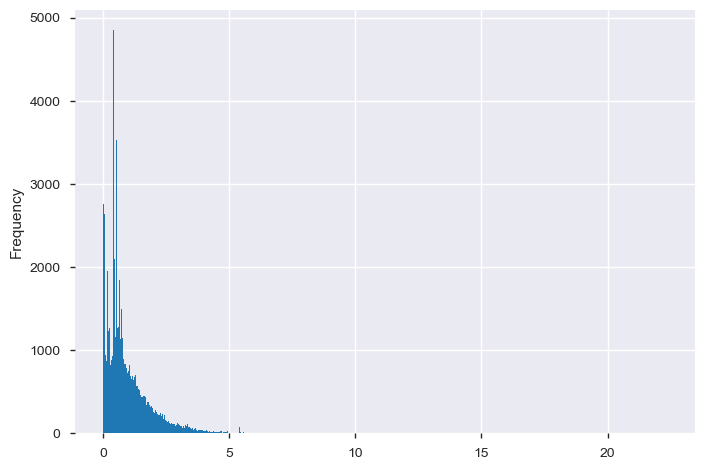

In [74]:
clear_df.order_distance.loc[((clear_df['order_distance']>0))].plot(kind='hist', bins=1000)

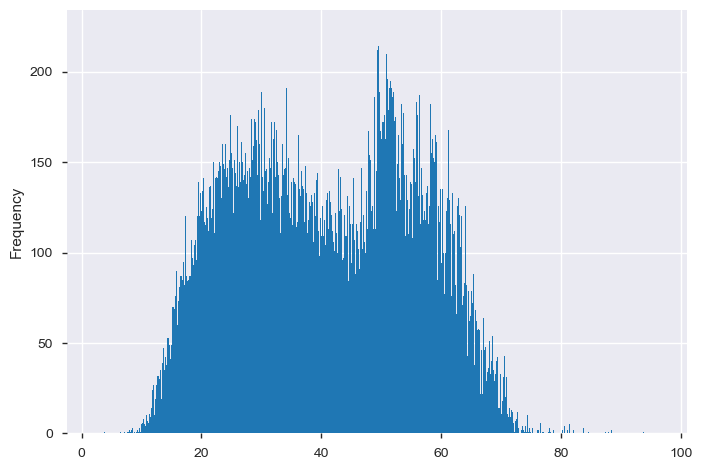

In [75]:
clear_df.av_speed.loc[((clear_df['av_speed']>0))].plot(kind='hist', bins= 1000)


#### Делаем ProfileRport модифицированного DataFrame - clear_df

In [76]:
cleardat_rep = ProfileReport(clear_df)
cleardat_rep

C:\Users\Prozo\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,17
Number of observations,99815
Total Missing (%),0.0%
Total size in memory,12.9 MiB
Average record size in memory,136.0 B
Numeric,11
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,3


#### Интересно:
- на графиках корреляции имеется выраженая положительная широта водителя- широта пассажира а также долгота водителя- долгота пассажира и отрицательная корреляция между широтой водителя и долготой пассажира.
Это косвенно говорит о том что заказ принемают водителя на ходящиеся на одной прямой линии по широте или долготе.
Можно предположить что дорожная сеть города имеет выраженое квартальное построение.

## Описание 4:
#### Цель: - преобразовать "текстовые " переменные категориальных признаков в "числовые".
- преобразовать [offer_class_group] и [ride_type_desc] с помощью (preprocessing.LabelEncoder()) clear_df['offer_class_group'] = l_encoding.fit_transform(clear_df.offer_class_group) +done



In [77]:
l_encoding = preprocessing.LabelEncoder()

clear_df['offer_class_group'] = l_encoding.fit_transform(clear_df.offer_class_group)
clear_df['ride_type_desc'] = l_encoding.fit_transform(clear_df.ride_type_desc)
clear_df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,av_speed,order_distance
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,0.000,0.000,1,3,0,0.000000,1.367355
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1,44.736487,3.423260
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0,41.308163,0.411356
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,0.000,0.000,1,3,1,0.000000,0.649440
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1,38.596364,1.064116


## Делим выборку на тестовые и обучаемые данные и "скармливаем " RandomForest 

In [78]:
ytrain = clear_df['driver_response']
xtrain = clear_df.drop('driver_response', axis=1)

In [79]:
ytrain.head()

0    0
1    1
2    0
3    1
4    1
Name: driver_response, dtype: int64

In [80]:
xtrain.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,av_speed,order_distance
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,0.000,0.000,1,3,0.000000,1.367355
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,44.736487,3.423260
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,41.308163,0.411356
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,0.000,0.000,1,3,0.000000,0.649440
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,38.596364,1.064116


In [81]:
%%time
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(xtrain, ytrain)
tra_score=rf.score(xtrain, ytrain)

Wall time: 3min 26s


In [83]:
print('Training acc:', round(tra_score*100, 2), '%')

Training acc: 100.0 %


#### Training acc: 100.0 %..... Ух ты...блин!!! очень похоже на ошибку



Я забыл отсеять не нужные столбцы: 'offer_gk'	'driver_gk' 'order_gk' ,можно ещё и широту и долготу водителя и пассажира и дистанцию и длительность т.к. имеем совокупные признаки order_distance и av_speed, но пока думаю не стоит, тк есть кореляция именно по широтам и долготе.


#### Сделаем Traintest 2:

In [84]:
clear_df2= clear_df.drop(['offer_gk','driver_gk','order_gk'], axis=1)
clear_df2

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,av_speed,order_distance
0,5,20,55.818842,37.334562,55.814567,37.355010,0.000,0.000,1,3,0,0.000000,1.367355
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1,44.736487,3.423260
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0,41.308163,0.411356
3,2,6,55.745922,37.421748,55.743469,37.431130,0.000,0.000,1,3,1,0.000000,0.649440
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1,38.596364,1.064116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2,55.961246,37.413497,55.966694,37.415754,17.378,29.817,1,3,0,34.969313,0.622748
99996,0,1,55.961246,37.413497,55.964892,37.413543,7.751,12.683,1,3,0,36.667981,0.405960
99997,1,20,55.961315,37.413497,55.962203,37.416373,46.983,46.217,4,3,0,60.994439,0.205033
99998,6,21,55.961354,37.413864,55.964892,37.413543,50.029,51.100,1,3,0,58.742466,0.394435


In [85]:
%%time
ytrain2 = clear_df2['driver_response']
xtrain2 = clear_df2.drop('driver_response', axis=1)
rf2 = RandomForestClassifier(n_estimators=1000)
rf2.fit(xtrain2, ytrain2)
tra_score2=rf2.score(xtrain2, ytrain2)


Wall time: 3min 11s


In [86]:
print('Training acc:', round(tra_score2*100, 2), '%')

Training acc: 99.51 %


#### Вуаля!!!....Training acc: 99.51 %
- то есть убирав,  казалось бы не нужные столбцы, результат получили хуже.


#### Сделаем Traintest 3, убрав столбцы с широтой  долготой расстоянием временем...думаю будет совсем плохо:


In [87]:
clear_df3= clear_df.drop(['offer_gk','driver_gk','order_gk','driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude','distance_km','duration_min'], axis=1)
clear_df3.head()

,weekday_key,hour_key,offer_class_group,ride_type_desc,driver_response,av_speed,order_distance
0,5,20,1,3,0,0.000000,1.367355
1,5,14,4,3,1,44.736487,3.423260
2,6,14,1,3,0,41.308163,0.411356
3,2,6,1,3,1,0.000000,0.649440
4,4,16,1,3,1,38.596364,1.064116


In [88]:
%%time
ytrain3 = clear_df3['driver_response']
xtrain3 = clear_df3.drop('driver_response', axis=1)
rf3 = RandomForestClassifier(n_estimators=1000)
rf3.fit(xtrain3, ytrain3)
tra_score3=rf3.score(xtrain3, ytrain3)


Wall time: 1min 52s


In [89]:
print('Training acc:', round(tra_score3*100, 2), '%')

Training acc: 99.5 %


### Training acc: 99.5 %
#### - результат такой же как и во втором случае, следовательно при подготовке данных целесообразно правильно обрабатывать имеющиеся данные на наличие выбросов и аномалий, а также создавать дополнительные "совокупные" признаки. При удалении признаков проводить мониторинг модели до и после удаления.

### Оптимальные значения получены в первой модели RandomForest на Dataset - clear_df: 

#### Training acc: 100.0 %

In [90]:
print('Training acc:', round(tra_score*100, 2), '%')

Training acc: 100.0 %
